# EDA and Storytelling


**Activity:**

In [1]:
#necessary packages
install.packages(c("sf", "rnaturalearth", "rnaturalearthdata","lwgeom","rlang")) 
install.packages(c("corrplot"))
library(corrplot)
library(RColorBrewer)
library(ggplot2)
library(sf)
library(tidyr)
library(rvest)
library(rnaturalearth)
library(lwgeom)
library(tidyverse)

Warning message in install.packages(c("sf", "rnaturalearth", "rnaturalearthdata", :
“installation of package ‘sf’ had non-zero exit status”Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
corrplot 0.92 loaded
in method for ‘dbWriteTable’ with signature ‘"PostgreSQLConnection","character","sf"’: no definition for class “PostgreSQLConnection”
in method for ‘dbDataType’ with signature ‘"PostgreSQLConnection","sf"’: no definition for class “PostgreSQLConnection”
in method for ‘coerce’ with signature ‘"Spatial","sf"’: no definition for class “Spatial”
in method for ‘coerce’ with signature ‘"Spatial","sfc"’: no definition for class “Spatial”
in method for ‘coerce’ with signature ‘"sf","Spatial"’: no definition for class “Spatial”
in method for ‘coerce’ with signature ‘"sfc","Spatial"’: no definition for class “Spatial”
in method for ‘coerce’ with signature ‘"XY","Spatial"’: no definitio

In [ ]:
### For the story I have considered two datasets:
# 1) Dataset-1 (was created by combining several individual datasets for CO2 emission ("5co2conti.csv"), 
# Population growth ("1popconti.csv"),energy consumption ("2combinedenergyconti.csv)",
# fossil fuel energy usage ("3everyfuelenergyworld.csv" and "4combinedfossilenergyconti.csv") and 
# temeprature change ("6tempworld.csv").From these datasets, I retained the data for world and six continents (Asia, Africa, Europe, 
# North America, South America, Australia) and then combined them to make dataset-1.

# 2) Dataset-2 ("co2-dataset.csv") was taken from https://ourworldindata.org/co2-and-other-greenhouse-gas-emissions website for
# annual country-wise CO2 emission.

In [4]:
### Dataset-1 preparation...
# reformatting dataset 
# link: CO2 Emission dataset- https://ourworldindata.org/co2-and-other-greenhouse-gas-emissions
# Population growth dataset- https://ourworldindata.org/world-population-growth
# Energy consumption dataset- https://ourworldindata.org/energy
# Fossil fuel dataset- https://ourworldindata.org/fossil-fuels
# Temperature anomaly dataset- https://ourworldindata.org/co2-and-other-greenhouse-gas-emissions


# Data Carpentary
# Here, I have not removed NA values as those values refer to data that was not collected.
# As I have combined many different datasets where data is not present it got replaced by NA. 


# continent-wise population growth data...
a<-read.csv("./Dataset/1popconti.csv");a1<-a[a$Entity %in% c("Asia","Africa","North America","South America","Europe","Australia","World"),]
a1$code<-with(a1, paste0(Entity,Year));a2<-a1[a1$Year > 1850 & a1$Year <2022,];head(a2)

# continent-wise energy usage (combined for all fuels)...
b<-read.csv("./Dataset/2combinedenergyconti.csv");b1<-b[b$Entity %in% c("Asia","Africa","North America","South America","Europe","Australia","World"),]
b1$code<-with(b1, paste0(Entity,Year));b2<-b1[b1$Year > 1850 & b1$Year <2022,];head(b2)

# global energy usage (based on fuel-type)...
c<-read.csv("./Dataset/3everyfuelenergyworld.csv");c1<-c[c$Entity %in% c("Asia","Africa","North America","South America","Europe","Australia","World"),]
c1$code<-with(c1, paste0(Entity,Year));c2<-c1[c1$Year > 1850 & c1$Year <2022,];head(c2)

# continent-wise energy usage (only fossil fuels)...
e<-read.csv("./Dataset/4combinedfossilenergyconti.csv");e1<-e[e$Entity %in% c("Asia","Africa","North America","South America","Europe","Australia","World"),]
e1$code<-with(e1, paste0(Entity,Year));e2<-e1[e1$Year > 1850 & e1$Year <2022,];head(e2)

# continent-wise co2 emission...
f<-read.csv("./Dataset/5co2conti.csv");f1<-f[f$Entity %in% c("Asia","Africa","North America","South America","Europe","Australia","World"),]
f1$code<-with(f1, paste0(Entity,Year));f2<-f1[f1$Year > 1850 & f1$Year <2022,];head(f2)

# global temperature change...
g<-read.csv("./Dataset/6tempworld.csv");g1<-g[g$Entity %in% c("Asia","Africa","North America","South America","Europe","Australia","World"),]
g1$code<-with(g1, paste0(Entity,Year));g2<-g1[g1$Year > 1850 & g1$Year <2022,];head(g2)

df_list<-list(a2,b2,c2,e2,f2,g2);summary(df_list)
df0<-df_list %>% reduce(full_join, by='code');tail(df0);head(df0);nrow(df0);colnames(df0)
df1<-df0[,-c(4,5,6,8,9,20,21,23,24,26,27)];tail(df1);head(df1);colnames(df1)
colnames(df1)<-c("Region","Year","Population","Primary energy","Other renewables","Biofuels","Solar","Wind","Hydro","Nuclear","Gas","Oil","Coal",
                 "Traditional biomass","Fossil energy","Annual CO2","Temperature")
#write.csv(df1,"popco2tempconti.csv",row.names=F)
colnames(df1)
summary(df1)

,Entity,Year,Population,code
,<fct>,<int>,<dbl>,<chr>
427,Africa,1851,112846162,Africa1851
428,Africa,1852,113385258,Africa1852
429,Africa,1853,113801930,Africa1853
430,Africa,1854,114222280,Africa1854
431,Africa,1855,114646381,Africa1855
432,Africa,1856,115074281,Africa1856


,Entity,Year,Primary.energy.consumption..TWh.,code
,<fct>,<int>,<dbl>,<chr>
41,Africa,1965,715.4214,Africa1965
42,Africa,1966,749.1416,Africa1966
43,Africa,1967,756.8380,Africa1967
44,Africa,1968,799.4022,Africa1968
45,Africa,1969,821.4099,Africa1969
46,Africa,1970,891.7524,Africa1970


,Entity,Year,Other.renewables..TWh.,Biofuels..TWh.,Solar..TWh.,Wind..TWh.,Hydropower..TWh.,Nuclear..TWh.,Gas..TWh.,Oil..TWh.,Coal..TWh.,Traditional.biomass..TWh.,code
,<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>
7,World,1860,0,0,0,0,0.00000,0,0,0,1061,6944,World1860
8,World,1870,0,0,0,0,0.00000,0,0,6,1642,6944,World1870
9,World,1880,0,0,0,0,0.00000,0,0,33,2542,6944,World1880
10,World,1890,0,0,0,0,38.88889,0,33,89,3856,6667,World1890
11,World,1900,0,0,0,0,47.22222,0,64,181,5728,6111,World1900
12,World,1910,0,0,0,0,91.66666,0,142,397,8656,6389,World1910


Entity,Year,Fossil.by.continent,code
<fct>,<int>,<dbl>,<chr>
Africa,1965,674.3027,Africa1965
Africa,1966,703.2787,Africa1966
Africa,1967,708.9625,Africa1967
Africa,1968,743.4017,Africa1968
Africa,1969,756.0577,Africa1969
Africa,1970,810.0495,Africa1970


,Entity,Year,Annual.CO2.emissions..tonnes.,code
,<fct>,<int>,<dbl>,<chr>
373,Africa,1851,0,Africa1851
374,Africa,1852,0,Africa1852
375,Africa,1853,0,Africa1853
376,Africa,1854,0,Africa1854
377,Africa,1855,0,Africa1855
378,Africa,1856,0,Africa1856


Entity,Year,Temperature.Anomaly,code
<fct>,<int>,<dbl>,<chr>
World,1880,-0.12,World1880
World,1881,-0.08,World1881
World,1882,-0.09,World1882
World,1883,-0.17,World1883
World,1884,-0.26,World1884
World,1885,-0.25,World1885


     Length Class      Mode
[1,]  4     data.frame list
[2,]  4     data.frame list
[3,] 13     data.frame list
[4,]  4     data.frame list
[5,]  4     data.frame list
[6,]  4     data.frame list

,Entity.x,Year.x,Population,code,Entity.y,Year.y,Primary.energy.consumption..TWh.,Entity.x.x,Year.x.x,Other.renewables..TWh.,⋯,Traditional.biomass..TWh.,Entity.y.y,Year.y.y,Fossil.by.continent,Entity.x.x.x,Year.x.x.x,Annual.CO2.emissions..tonnes.,Entity.y.y.y,Year.y.y.y,Temperature.Anomaly
,<fct>,<int>,<dbl>,<chr>,<fct>,<int>,<dbl>,<fct>,<int>,<dbl>,⋯,<int>,<fct>,<int>,<dbl>,<fct>,<int>,<dbl>,<fct>,<int>,<dbl>
1192,World,2016,7513474048,World2016,World,2016,154418.8,World,2016,1737.302,⋯,11111,World,2016,130825.7,World,2016,35452459298,World,2016,0.99
1193,World,2017,7599822336,World2017,World,2017,157406.3,World,2017,1850.660,⋯,11111,World,2017,132796.4,World,2017,35925737687,World,2017,0.90
1194,World,2018,7683789824,World2018,World,2018,161772.6,World,2018,1995.826,⋯,11111,World,2018,135922.8,World,2018,36646139785,World,2018,0.82
1195,World,2019,7764951040,World2019,World,2019,163174.0,World,2019,2095.158,⋯,11111,World,2019,136131.5,World,2019,36702502903,World,2019,0.94
1196,World,2020,7840952832,World2020,World,2020,156669.9,World,2020,2185.724,⋯,11111,World,2020,128800.4,World,2020,34807259099,World,2020,0.98
1197,World,2021,7909295104,World2021,World,2021,165319.7,World,2021,2373.099,⋯,11111,World,2021,136018.3,NA,NA,NA,World,2021,0.84


Entity.x,Year.x,Population,code,Entity.y,Year.y,Primary.energy.consumption..TWh.,Entity.x.x,Year.x.x,Other.renewables..TWh.,⋯,Traditional.biomass..TWh.,Entity.y.y,Year.y.y,Fossil.by.continent,Entity.x.x.x,Year.x.x.x,Annual.CO2.emissions..tonnes.,Entity.y.y.y,Year.y.y.y,Temperature.Anomaly
<fct>,<int>,<dbl>,<chr>,<fct>,<int>,<dbl>,<fct>,<int>,<dbl>,⋯,<int>,<fct>,<int>,<dbl>,<fct>,<int>,<dbl>,<fct>,<int>,<dbl>
Africa,1851,112846162,Africa1851,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,Africa,1851,0,NA,NA,NA
Africa,1852,113385258,Africa1852,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,Africa,1852,0,NA,NA,NA
Africa,1853,113801930,Africa1853,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,Africa,1853,0,NA,NA,NA
Africa,1854,114222280,Africa1854,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,Africa,1854,0,NA,NA,NA
Africa,1855,114646381,Africa1855,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,Africa,1855,0,NA,NA,NA
Africa,1856,115074281,Africa1856,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,Africa,1856,0,NA,NA,NA


[1] 1197

[1] "Entity.x"                         "Year.x"                          
 [3] "Population"                       "code"                            
 [5] "Entity.y"                         "Year.y"                          
 [7] "Primary.energy.consumption..TWh." "Entity.x.x"                      
 [9] "Year.x.x"                         "Other.renewables..TWh."          
[11] "Biofuels..TWh."                   "Solar..TWh."                     
[13] "Wind..TWh."                       "Hydropower..TWh."                
[15] "Nuclear..TWh."                    "Gas..TWh."                       
[17] "Oil..TWh."                        "Coal..TWh."                      
[19] "Traditional.biomass..TWh."        "Entity.y.y"                      
[21] "Year.y.y"                         "Fossil.by.continent"             
[23] "Entity.x.x.x"                     "Year.x.x.x"                      
[25] "Annual.CO2.emissions..tonnes."    "Entity.y.y.y"                    
[27] "Year.y.y.y"                       "Temperature.Anomaly"

,Entity.x,Year.x,Population,Primary.energy.consumption..TWh.,Other.renewables..TWh.,Biofuels..TWh.,Solar..TWh.,Wind..TWh.,Hydropower..TWh.,Nuclear..TWh.,Gas..TWh.,Oil..TWh.,Coal..TWh.,Traditional.biomass..TWh.,Fossil.by.continent,Annual.CO2.emissions..tonnes.,Temperature.Anomaly
,<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
1192,World,2016,7513474048,154418.8,1737.302,946.9468,876.9553,2575.582,10741.49,6714.796,35560.77,51760.78,43504.16,11111,130825.7,35452459298,0.99
1193,World,2017,7599822336,157406.3,1850.660,972.5343,1185.5150,3034.917,10831.41,6734.873,36529.22,52515.54,43751.68,11111,132796.4,35925737687,0.90
1194,World,2018,7683789824,161772.6,1995.826,1045.9080,1524.5497,3360.019,11067.52,6856.017,38356.30,53250.62,44315.88,11111,135922.8,36646139785,0.82
1195,World,2019,7764951040,163174.0,2095.158,1120.1494,1855.5922,3744.515,11153.79,7073.290,39062.95,53368.63,43699.89,11111,136131.5,36702502903,0.94
1196,World,2020,7840952832,156669.9,2185.724,1065.5649,2222.4431,4192.682,11413.83,6789.302,38455.73,48380.71,41963.96,11111,128800.4,34807259099,0.98
1197,World,2021,7909295104,165319.7,2373.099,1139.9211,2701.7222,4872.095,11183.23,7031.339,40374.61,51170.47,44473.20,11111,136018.3,NA,0.84


Entity.x,Year.x,Population,Primary.energy.consumption..TWh.,Other.renewables..TWh.,Biofuels..TWh.,Solar..TWh.,Wind..TWh.,Hydropower..TWh.,Nuclear..TWh.,Gas..TWh.,Oil..TWh.,Coal..TWh.,Traditional.biomass..TWh.,Fossil.by.continent,Annual.CO2.emissions..tonnes.,Temperature.Anomaly
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
Africa,1851,112846162,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,0,NA
Africa,1852,113385258,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,0,NA
Africa,1853,113801930,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,0,NA
Africa,1854,114222280,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,0,NA
Africa,1855,114646381,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,0,NA
Africa,1856,115074281,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,0,NA


[1] "Entity.x"                         "Year.x"                          
 [3] "Population"                       "Primary.energy.consumption..TWh."
 [5] "Other.renewables..TWh."           "Biofuels..TWh."                  
 [7] "Solar..TWh."                      "Wind..TWh."                      
 [9] "Hydropower..TWh."                 "Nuclear..TWh."                   
[11] "Gas..TWh."                        "Oil..TWh."                       
[13] "Coal..TWh."                       "Traditional.biomass..TWh."       
[15] "Fossil.by.continent"              "Annual.CO2.emissions..tonnes."   
[17] "Temperature.Anomaly"

[1] "Region"              "Year"                "Population"         
 [4] "Primary energy"      "Other renewables"    "Biofuels"           
 [7] "Solar"               "Wind"                "Hydro"              
[10] "Nuclear"             "Gas"                 "Oil"                
[13] "Coal"                "Traditional biomass" "Fossil energy"      
[16] "Annual CO2"          "Temperature"

           Region         Year        Population         Primary energy    
 Africa       :171   Min.   :1851   Min.   :    663068   Min.   :   425.8  
 Asia         :171   1st Qu.:1893   1st Qu.:  90456927   1st Qu.:  2613.2  
 Australia    :171   Median :1936   Median : 354405276   Median : 20787.1  
 Europe       :171   Mean   :1936   Mean   : 887278763   Mean   : 29274.2  
 North America:171   3rd Qu.:1979   3rd Qu.: 996049773   3rd Qu.: 33108.8  
 South America:171   Max.   :2021   Max.   :7909295104   Max.   :165319.7  
 (Other)      :171                                       NA's   :798       
 Other renewables     Biofuels           Solar                Wind         
 Min.   :   0.00   Min.   :   0.00   Min.   :   0.0000   Min.   :   0.000  
 1st Qu.:  85.59   1st Qu.:  11.37   1st Qu.:   0.0000   1st Qu.:   0.000  
 Median : 288.09   Median :  83.35   Median :   0.0398   Median :   0.779  
 Mean   : 541.48   Mean   : 232.84   Mean   : 186.8862   Mean   : 513.592  
 3rd Qu.: 74

Warning message:
“Removed 798 rows containing missing values (geom_path).”

png 
  2

Warning message:
“Removed 798 rows containing missing values (geom_path).”

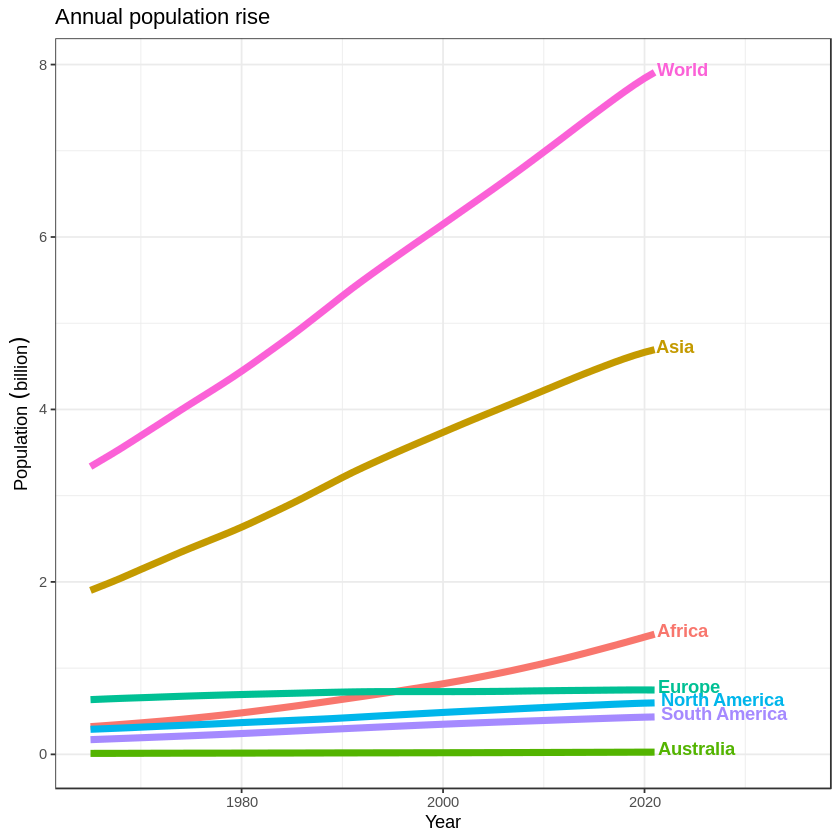

In [5]:
### "Population growth" plot...
# At first I have plotted the world population along with continent-wise population to see how it 
# got incremented over the years.

pop<-df1[,c(1:3)] 
myplot<-ggplot(pop,aes(x=Year,y=Population/1000000000,group=Region), na.rm=TRUE) +
  xlab("Year") + 
  ylab(expression(Population~(billion))) +
  geom_line(aes(color = Region),size=2,show.legend = F) +
  theme_bw() +
 scale_x_continuous(limits = c(1965,2035)) +
geom_text(data = subset(pop, Year == "2021"),aes(color=Region,label=Region),
            hjust = -0.05,vjust=0.25,fontface="bold",show.legend = F) +
  ggtitle("Annual population rise")
png("Population rise.png")
print(myplot)
dev.off()
myplot

Warning message:
“Removed 798 rows containing missing values (geom_path).”

png 
  2

Warning message:
“Removed 798 rows containing missing values (geom_path).”

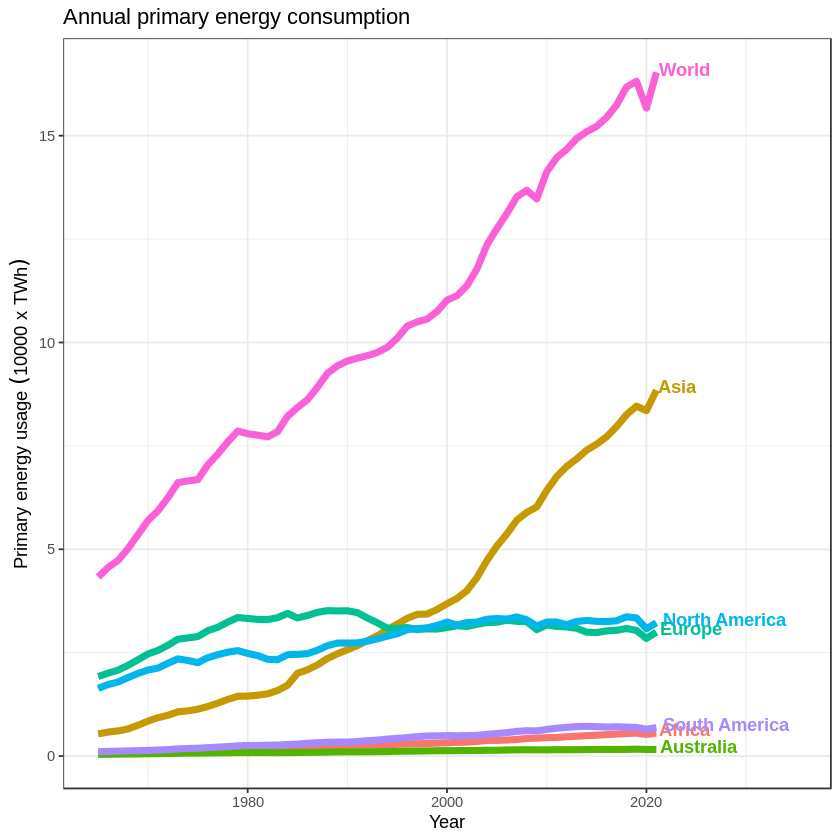

In [6]:
### "Primary energy consumption" plot...
# We have seen that how population increased over the years, now let's check the status of energy 
# consumption globally and continent-wise.

ene<-df1[,c(1,2,4)]
myplot1<-ggplot(ene,aes(x=Year,y=`Primary energy`/10000,group=Region)) +
  xlab("Year") + 
  ylab(expression(Primary~energy~usage~(10000~x~TWh))) +
  geom_line(aes(color = Region),size=2,show.legend = F) +
  theme_bw()  +
  scale_x_continuous(limits = c(1965,2035)) +
  geom_text(data = subset(ene, Year == "2021"),aes(color=Region,label=Region),
            hjust = -0.05,vjust=0.25,fontface="bold",show.legend = F) +
  ggtitle("Annual primary energy consumption")
png("Primary energy consumption.png")
print(myplot1)
dev.off()
myplot1

Warning message:
“Removed 1140 rows containing missing values (geom_path).”

png 
  2

Warning message:
“Removed 1140 rows containing missing values (geom_path).”

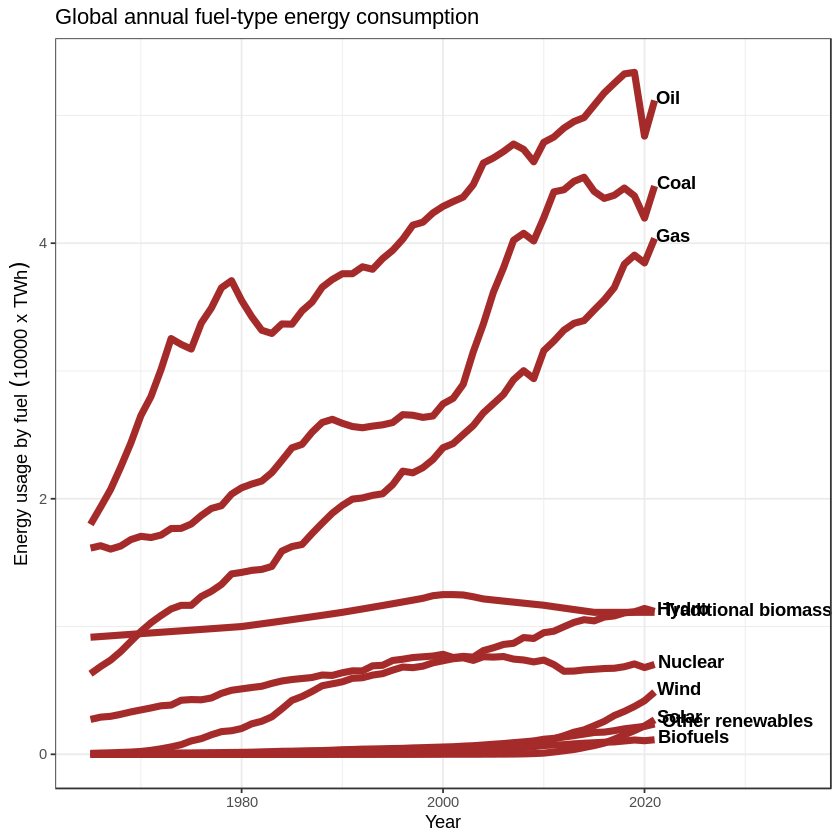

In [7]:
### Global energy consmuption (fuel-type) plot...
# Since energy demand increased over the years due to rising population, I looked at the type of fuel
# used to feed this increasing demand.

fue<-df1[df1$Region=="World",c(1,2,5:14)];fue1<-data.frame(unlist(fue[,-c(1:2)]))
fue1$fuel<-rep(c("Other renewables","Biofuels","Solar","Wind","Hydro","Nuclear","Gas","Oil","Coal","Traditional biomass"),each=171)
fue1$Year<-c(1851:2021);colnames(fue1)<-c("Energy","Fuel","Year");rownames(fue1)<-c(1:1710);
#fue1,aes(x=Year,y=Energy/10000,group=Fuel)
myplot2<-ggplot(fue1) +
  geom_line(aes(x=Year,y=Energy/10000,group=Fuel),color = "brown",size=2,show.legend = F) +
  xlab("Year") + 
  ylab(expression(Energy~usage~by~fuel~(10000~x~TWh))) +
  theme_bw()+
  scale_x_continuous(limits = c(1965,2035)) +
  geom_text(data = subset(fue1, Year == "2021"),aes(x=Year,y=Energy/10000,label=Fuel),color="black",
            hjust = -0.05,vjust=0.25,fontface="bold",show.legend = F) +
  ggtitle("Global annual fuel-type energy consumption")
png("Fuel-type energy.png")
print(myplot2)
dev.off()
myplot2

Warning message:
“Removed 798 rows containing missing values (geom_path).”

png 
  2

Warning message:
“Removed 798 rows containing missing values (geom_path).”

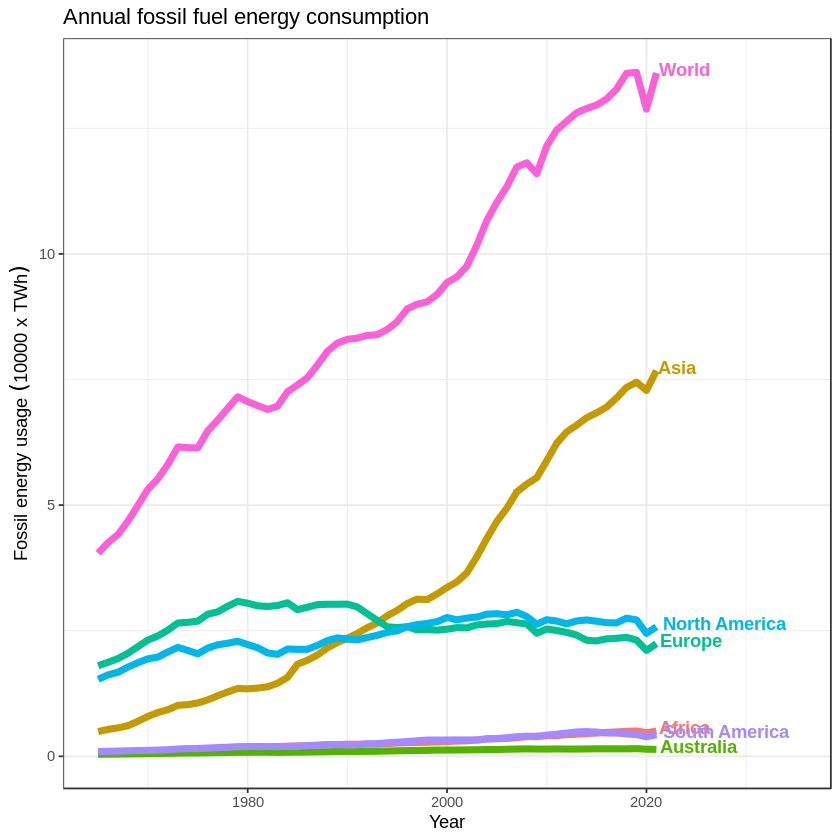

In [8]:
### "Fossil fuel energy consumption" plot as supplementary...
# I further looked into the trend of energy sourced from fossil fuels along the years as above graph suggested
# increased fossil fuel usage for meeting rising energy demands.
foss<-df1[,c(1,2,15)]
myplot3<-ggplot(foss,aes(x=Year,y=`Fossil energy`/10000,group=Region)) +
  xlab("Year") + 
  ylab(expression(Fossil~energy~usage~(10000~x~TWh))) +
  geom_line(aes(color = Region),size=2,show.legend = F) +
  theme_bw()+
  scale_x_continuous(limits = c(1965,2035)) +
  geom_text(data = subset(foss, Year == "2021"),aes(color=Region,label=Region),
            hjust = -0.05,vjust=0.25,fontface="bold",show.legend = F)+
  ggtitle("Annual fossil fuel energy consumption")
png("Fossil energy usage.png")
print(myplot3)
dev.off()
myplot3

Warning message:
“Removed 337 rows containing missing values (geom_bar).”

png 
  2

Warning message:
“Removed 337 rows containing missing values (geom_bar).”

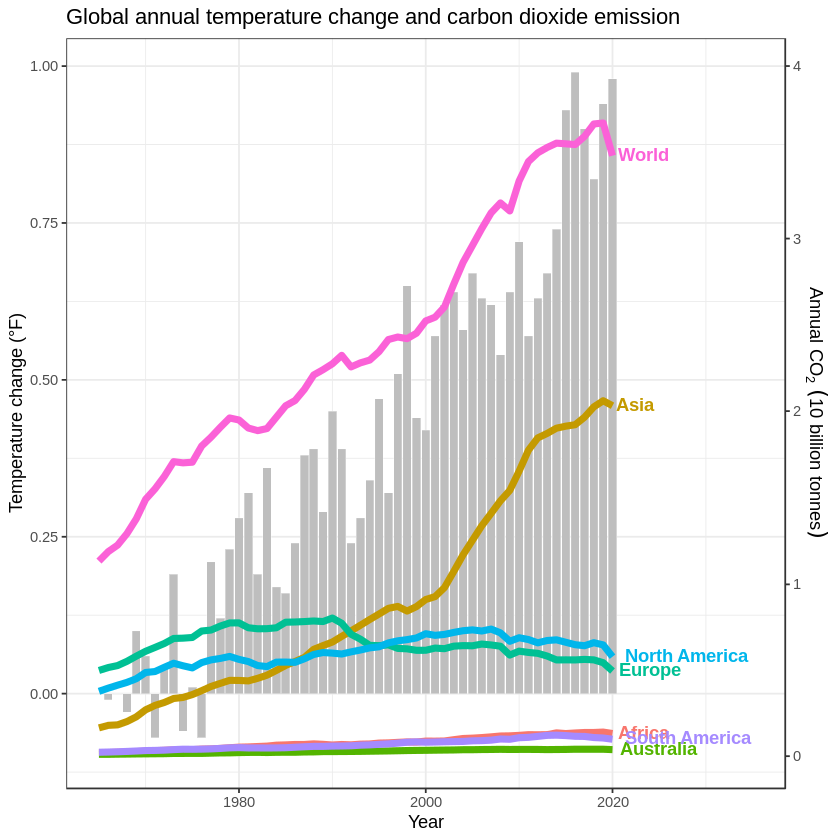

In [9]:
### Global temperature change and CO2 emission...
# Finally, in this plot I plotted carbon dioxide emission and temperature change over the years. Temperature change is 
# plotted as a bar chart while carbon dioxide emission data is plotted continent-wise as line plots.

temp<-df1[df1$Year%in%c(1965:2020),c(1,2,16,17)]
ylim.prim<-c(-0.1,1)
ylim.sec<-c(0,4)
b<-diff(ylim.prim)/diff(ylim.sec)
a<-ylim.prim[1] - b*ylim.sec[1]
myplot5<-ggplot() + theme_bw() +
  geom_bar(data=temp,aes(x=Year, y=Temperature),fill="gray",color="white",stat="identity",position = "dodge",size=0.1,show.legend =F) +
  geom_line(data=temp,aes(x=Year,y=a+(`Annual CO2`/10000000000)*b,color=Region),size=2,show.legend = F) +
  geom_text(data = subset(temp, Year == "2020"),aes(x=Year,y=a+(`Annual CO2`/10000000000)*b,color=Region,label=Region),
            hjust = -0.1,vjust=0.4,fontface="bold",show.legend = F) +
  scale_y_continuous("Temperature change (°F)",sec.axis=sec_axis(~(.-a)/b,name=expression(Annual~CO[2]~(10~billion~tonnes))))+
  scale_x_continuous("Year",limits = c(1965,2035)) +
  ggtitle("Global annual temperature change and carbon dioxide emission")
png("Carbon emission vs temp change.png")
print(myplot5)
dev.off()
myplot5

,Year,Population,Fossil energy,Annual CO2,Temperature
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1141,1965,3337112064,40433.58,11317232919,-0.07
1142,1966,3406416896,42534.03,11865861396,-0.01
1143,1967,3475448064,44166.98,12243045540,0.00
1144,1968,3546810880,46833.81,12909912521,-0.03
1145,1969,3620655360,49985.15,13766570654,0.10
1146,1970,3695390208,53178.58,14897567094,0.06


$corr
              Temperature      Year Population Fossil energy Annual CO2
Temperature     1.0000000 0.9520311  0.9523946     0.9409166  0.9348390
Year            0.9520311 1.0000000  0.9997297     0.9887630  0.9842298
Population      0.9523946 0.9997297  1.0000000     0.9886423  0.9842319
Fossil energy   0.9409166 0.9887630  0.9886423     1.0000000  0.9992319
Annual CO2      0.9348390 0.9842298  0.9842319     0.9992319  1.0000000

$corrPos
           xName         yName x y      corr
1    Temperature   Temperature 1 5 1.0000000
2           Year   Temperature 2 5 0.9520311
3           Year          Year 2 4 1.0000000
4     Population   Temperature 3 5 0.9523946
5     Population          Year 3 4 0.9997297
6     Population    Population 3 3 1.0000000
7  Fossil energy   Temperature 4 5 0.9409166
8  Fossil energy          Year 4 4 0.9887630
9  Fossil energy    Population 4 3 0.9886423
10 Fossil energy Fossil energy 4 2 1.0000000
11    Annual CO2   Temperature 5 5 0.9348390
12    Annual

png 
  2

$corr
              Temperature      Year Population Fossil energy Annual CO2
Temperature     1.0000000 0.9520311  0.9523946     0.9409166  0.9348390
Year            0.9520311 1.0000000  0.9997297     0.9887630  0.9842298
Population      0.9523946 0.9997297  1.0000000     0.9886423  0.9842319
Fossil energy   0.9409166 0.9887630  0.9886423     1.0000000  0.9992319
Annual CO2      0.9348390 0.9842298  0.9842319     0.9992319  1.0000000

$corrPos
           xName         yName x y      corr
1    Temperature   Temperature 1 5 1.0000000
2           Year   Temperature 2 5 0.9520311
3           Year          Year 2 4 1.0000000
4     Population   Temperature 3 5 0.9523946
5     Population          Year 3 4 0.9997297
6     Population    Population 3 3 1.0000000
7  Fossil energy   Temperature 4 5 0.9409166
8  Fossil energy          Year 4 4 0.9887630
9  Fossil energy    Population 4 3 0.9886423
10 Fossil energy Fossil energy 4 2 1.0000000
11    Annual CO2   Temperature 5 5 0.9348390
12    Annual CO2          Year 5 4 0.9842298
13    Annual CO2    Population 5 3 0.9842319
14    Annual CO2 Fossil energy 5 2 0.9992319
15    Annual CO2    Annual CO2 5 1 1.0000000

$arg
$arg$type
[1] "upper"

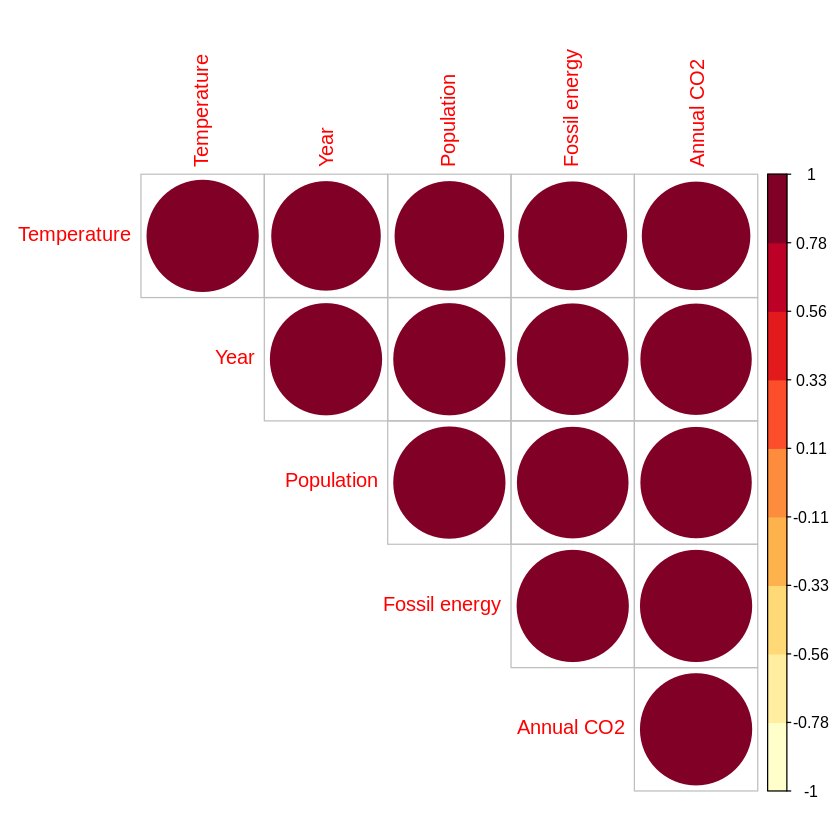

In [10]:
# Finally, I have checked statistical correlation (suplementary plots) among the various attributes plotted above for world data...

correlation<-df1[df1$Region=="World" & df1$Year%in%c(1965:2020),c(2,3,15,16,17)];head(correlation)
M <-cor(correlation)
worldcorplot<-corrplot(M, type="upper", order="hclust",col=brewer.pal(n=9, name="YlOrRd"))
worldcorplot

Coordinate system already present. Adding new coordinate system, which will replace the existing one.


png 
  2

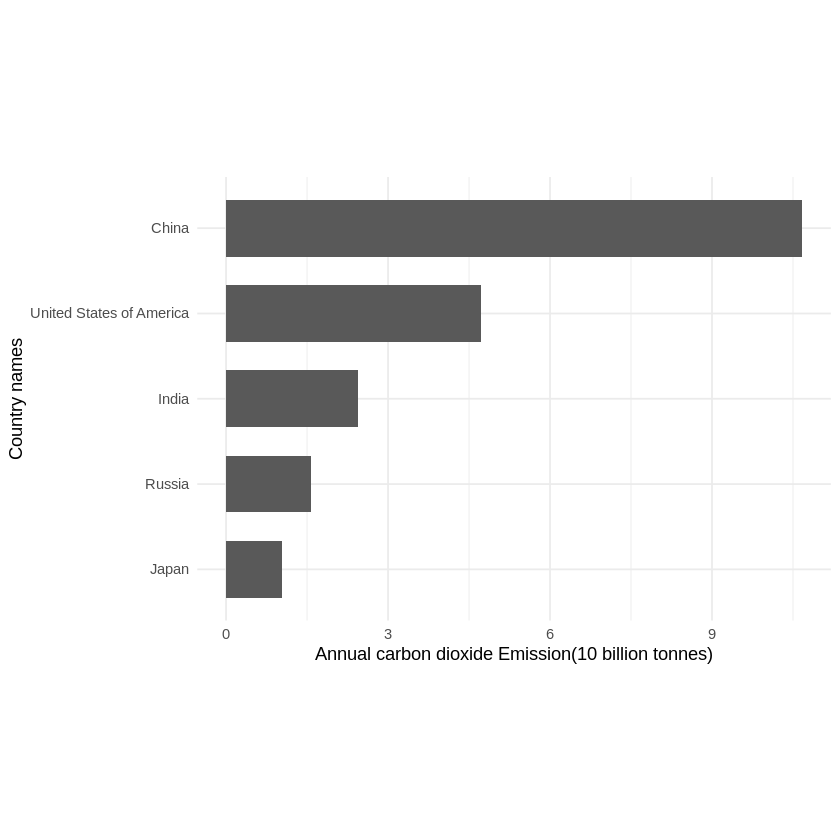

In [2]:
# As we obtained a very high corrrelation among attributes, I next plotted here a country-wise bbar plot of CO2 emission 
# annd visualized the top 5 contributing countries...

dataframe<-read.csv("./Dataset/co2_dataset.csv")
# countrywise co2
df_co2= dataframe[dataframe$Year==2020, ]
df_co2$Annual.CO2=df_co2$Annual.CO2/1000000000
#df_co2
df_co21=df_co2[order(df_co2$Annual.CO2, decreasing =T), ][1:5,]

myplot6=ggplot(df_co21, aes(x = reorder(Entity, Annual.CO2), y = Annual.CO2)) + geom_bar(stat = "identity", position="dodge",width=0.3)+
theme_minimal() + theme(aspect.ratio = .7) + geom_col(width = 2/3) + coord_fixed(1.2)+coord_flip()+ 
labs(x= "Country names", y= "Annual carbon dioxide Emission(10 billion tonnes)")
png("Countrywise CO2.png")
print(myplot6)
dev.off()
myplot6

[1] "sf"         "data.frame"

png 
  2

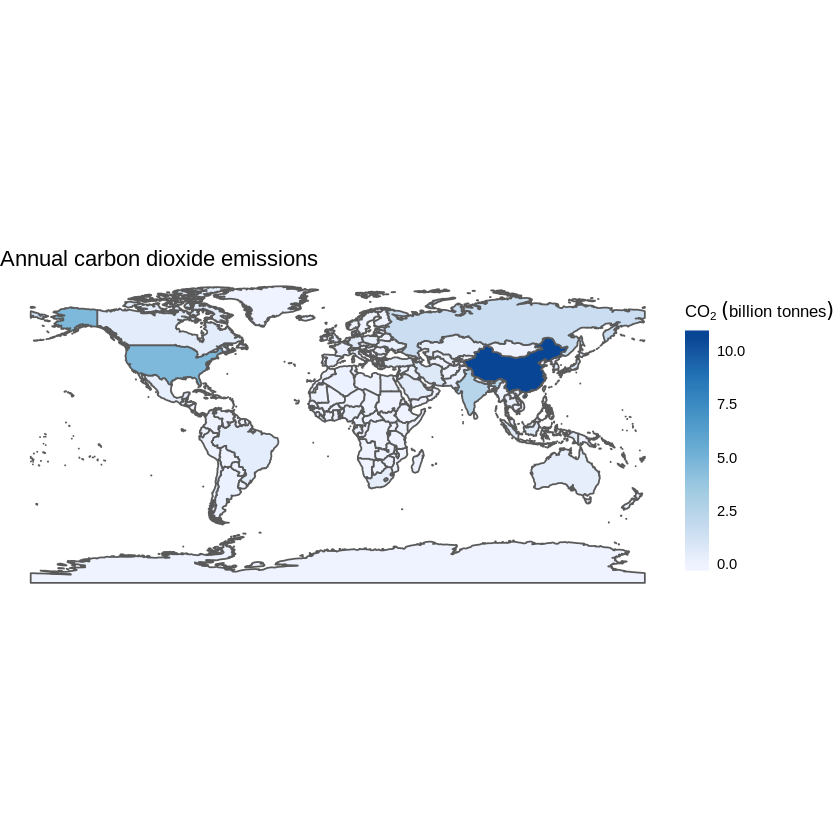

In [3]:
# Finally, visualized the annual co2 emission by the coountries on the world map for the year 2020 in the
# "Global distribution of CO2 emission levels, 2020" plot...
world <- ne_countries(scale = "medium", returnclass = "sf"); class(world)
world1<-merge(world,dataframe,by="adm0_a3")
#head(world1)
p<-world1[world1$Year=="2020",]
options(scipen=1)
myplot7<-ggplot(data = p) + 
geom_sf(aes(fill=Annual.CO2/1000000000))  + theme_void() + 
labs(title = "Annual carbon dioxide emissions",fill = expression(CO[2]~(billion~tonnes))) + 
scale_fill_distiller(palette = "Blues", type = 'seq',na.value = "grey60", direction = 1,guide = guide_colorbar(direction = "vertical",
label.position = "right",title.position = "top", ticks = FALSE,barwidth = grid::unit(0.2, "in"),barheight = grid::unit(2, "in"))) +
theme(legend.direction="vertical",legend.title =element_text(size=10))
myplot7
png("Annual CO2.png")
print(myplot7)
dev.off()
